<a href="https://colab.research.google.com/github/EllingtonKirby/MNIST-Implementation/blob/master/MNIST_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# 1 - Reviewing how to untar datasets

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

#2 - Reviewing how to access PyTorch datasets

In [ ]:
!pip install torchvision

In [ ]:
import torchvision
from torchvision import datasets

In [ ]:
#mnist_dataset = datasets.MNIST('/root/', download=True, train=True)
#mnist_dataset

In [ ]:
#from PIL import Image

In [ ]:
#first_image, label = mnist_dataset.__getitem__(0)
#first_image

In [ ]:
#tensor_first_image = tensor(first_image)
#df = pd.DataFrame(tensor_first_image[:,:])
#df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

#3 - Accessing the full MNIST Sample via FastAI

In [ ]:
path_full = untar_data(URLs.MNIST)

In [ ]:
Path.BASE_PATH = path_full

In [ ]:
path_full.ls()

(#2) [Path('training'),Path('testing')]

In [ ]:
mnist_test_data = (path_full/'training').ls()
mnist_test_data

(#10) [Path('training/8'),Path('training/0'),Path('training/2'),Path('training/4'),Path('training/5'),Path('training/7'),Path('training/9'),Path('training/3'),Path('training/1'),Path('training/6')]

In [ ]:
testing = (path_full/'testing').ls()
testing

(#10) [Path('testing/8'),Path('testing/0'),Path('testing/2'),Path('testing/4'),Path('testing/5'),Path('testing/7'),Path('testing/9'),Path('testing/3'),Path('testing/1'),Path('testing/6')]

In [ ]:
# Let's take a look at a single 0
test_data_zeroes = (path_full/'training/0').ls().sorted()
test_data_zeroes

(#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...]

In [ ]:
test_data_zeroes[0]
zeroes_example_image = Image.open(test_data_zeroes[0])
zeroes_example_image

In [ ]:
tensor_zeroes_exmaple_image = tensor(zeroes_example_image)
df = pd.DataFrame(tensor_zeroes_exmaple_image[:,:])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0


In [ ]:
tensor_zeroes = [tensor(Image.open(o)) for o in test_data_zeroes]
len(tensor_zeroes)

5923

# 4- Creating the stacked tensors

In [ ]:
def create_list_of_tensors(test_data_ordinal):
  return [tensor(Image.open(o)) for o in (path_full/'training'/test_data_ordinal).ls().sorted()]

In [ ]:
tensor_ones = create_list_of_tensors('1')
tensor_twos = create_list_of_tensors('2')
tensor_threes = create_list_of_tensors('3')
tensor_fours = create_list_of_tensors('4')
tensor_fives = create_list_of_tensors('5')
tensor_sixes = create_list_of_tensors('6')
tensor_sevens = create_list_of_tensors('7')
tensor_eights = create_list_of_tensors('8')
tensor_nines = create_list_of_tensors('9')
f'ones: {len(tensor_ones)}, twos: {len(tensor_twos)}, threes: {len(tensor_threes)}, fours: {len(tensor_fours)}, fives: {len(tensor_fives)}, sixes: {len(tensor_sixes)}, sevens: {len(tensor_sevens)}, eights: {len(tensor_eights)}, nines: {len(tensor_nines)}'

'ones: 6742, twos: 5958, threes: 6131, fours: 5842, fives: 5421, sixes: 5918, sevens: 6265, eights: 5851, nines: 5949'

In [ ]:
def create_float_stack(tensors):
  return torch.stack(tensors).float()/255

In [ ]:
stacked_zeroes = create_float_stack(tensor_zeroes)
stacked_zeroes.shape

torch.Size([5923, 28, 28])

In [ ]:
listed_all_numerals = [tensor_zeroes, tensor_ones, tensor_twos, tensor_threes, tensor_fours, tensor_fives, tensor_sixes, tensor_sevens, tensor_eights, tensor_nines]

In [ ]:
training_stacks = [create_float_stack(it) for it in listed_all_numerals]

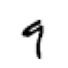

In [ ]:
show_image(training_stacks[9][0])

In [ ]:
mean_of_numerals = [it.mean(0) for it in training_stacks]

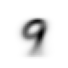

In [ ]:
show_image(mean_of_numerals[9])

# 5 - Testing the baseline

In [ ]:
import torch.nn.functional as F

In [ ]:
# Testing differences
sample_zero_differences = [F.l1_loss(training_stacks[0][0].float(), it) for it in mean_of_numerals]
sample_eight_differences = [F.l1_loss(training_stacks[8][0].float(), it) for it in mean_of_numerals]
sample_six_differences = [F.l1_loss(training_stacks[6][0].float(), it) for it in mean_of_numerals]
sample_zero_differences.index(min(sample_zero_differences)), sample_eight_differences.index(min(sample_eight_differences)), sample_six_differences.index(min(sample_six_differences))

(0, 1, 6)

In [ ]:
# Calculating metrics for our baseline
# def evaluate_baseline():
#   accuracy = []
#   for data, label in mnist_dataset:
#     current_tensor = tensor(data).float()/255
#     differences_against_means = [F.l1_loss(current_tensor, it) for it in mean_of_numerals]
#     prediction = differences_against_means.index(min(differences_against_means))
#     accuracy.append(prediction == label)
#   return accuracy

In [ ]:
# accuracies = evaluate_baseline()

In [ ]:
# overall_accuracy = tensor(accuracies).float().mean()
# overall_accuracy

# 6 - Applying Gradient Descent

In [ ]:
# Create a single tensor from the stacks
concat_x = torch.empty(0,28,28)
for stack in training_stacks:
  concat_x = torch.cat([concat_x, stack])
train_x = concat_x.view(-1, 28*28)
train_x.shape

torch.Size([60000, 784])

In [ ]:
# Create the labels from the data
concat_y = torch.empty(0)
for index in range(10):
  number_of_labels = len(training_stacks[index])
  concat_y = torch.cat([concat_y, tensor([index]*number_of_labels)])
train_y = concat_y.unsqueeze(1)
train_y.shape

torch.Size([60000, 1])

In [ ]:
# Create the dataset
total_dset = list(zip(train_x, train_y))
x,y = total_dset[0]
x.shape, y

(torch.Size([784]), tensor([0.]))

In [ ]:
# Split the total dataset into separate train and validation sets
np.random.shuffle(total_dset)
split_index = int(.8 * len(total_dset))
split_index

48000

In [ ]:
training = total_dset[:split_index]
validation = total_dset[split_index:]
len(training), len(validation)

(48000, 12000)

In [ ]:
dataloader = DataLoader(total_dset, batch_size=256)

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights = init_params((28*28,10))
bias = init_params(10)
weights,bias

(tensor([[ 1.9269,  1.4873,  0.9007,  ..., -1.6047, -0.7521,  1.6487],
         [-0.3925, -1.4036, -0.7279,  ..., -0.1596, -0.4974,  0.4396],
         [-0.7581,  1.0783,  0.8008,  ...,  1.3347, -0.2316,  0.0418],
         ...,
         [-0.0560, -0.4547,  1.2942,  ...,  1.1133,  2.1901,  0.3531],
         [ 0.4474,  0.7192, -1.9300,  ..., -0.8714,  0.2235,  0.2528],
         [ 0.2169,  0.4700,  0.3268,  ...,  0.0470,  0.5487, -1.9951]], requires_grad=True),
 tensor([ 1.3673, -0.3805,  0.4782,  1.3093,  0.5289,  1.6473,  1.4642,  0.2509,  0.9407,  0.8538], requires_grad=True))

In [ ]:
def linear1(xb): return xb@weights + bias

In [ ]:
def softmax(xb):
  return torch.exp(xb) / torch.exp(xb).sum(dim=1, keepdim=True)

In [ ]:
def forward(xb):
  z1 = linear1(xb)
  return softmax(z1)

In [ ]:
example_x, example_y = first(dataloader)
preds = linear1(example_x)
preds.shape

torch.Size([256, 10])

In [ ]:
after_softmax = softmax(preds)
after_softmax.shape, after_softmax[0].shape, torch.sum(after_softmax[0])

(torch.Size([256, 10]),
 torch.Size([10]),
 tensor(1.0000, grad_fn=<SumBackward0>))

In [ ]:
def mnist_loss(predictions, targets):
    # This gives us a range over the batch size
    idx = range(len(targets))
    # This sums the prediction index
    return 1 - torch.sum(predictions[idx, targets.long()])

In [ ]:
after_softmax[range(len(example_y)), 0].shape
# , after_softmax[range(len(example_y)), example_y.long()]

torch.Size([256])

In [ ]:
mnist_loss(preds, train_y)